# Trabalho 1 - Parte I - Projeto de Análise de Dados

## Componentes

- Raphael Ramos
- Vitor Gabriel

## Datasets escolhidos

*Air Quality Data in India (2015 - 2020)*. Disponível em: https://www.kaggle.com/datasets/rohanrao/air-quality-data-in-india

*India's Largest Cities Weather (2010-2019)*. Disponível em: https://www.kaggle.com/datasets/bwandowando/indias-largest-cities-weather-data-2010-2019

## Objetivo geral

Fazer um estudo de caso na Índia para entender como os substratos que poluem o ar (PM 2.5, PM10, CO, etc.) estão influenciando em variáveis climáticas, mais especificamente a temperatura, precipitações e radiação solar.

## Explicação do dataset

Os datasets utilizados neste trabalho contém dados sobre a qualidade do ar e o clima em algumas cidades da Índia no período entre 2010 a 2020

In [1]:
import sys
sys.path.append('../')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from utils.charts import plot_bar

data_path = '../data'

### Concentrações de poluentes diária por cidade

| Nome da coluna | Descrição                                                                 | Tipo de dado      |
|----------------|---------------------------------------------------------------------------|-------------------|
| City           | Nome da cidade onde os dados foram coletados                              | Texto             |
| Date           | Data da coleta dos dados                                                  | Data              |
| PM2.5          | Concentração de partículas finas com diâmetro ≤ 2.5 micrômetros (μg/m³)   | Numérico (float)  |
| PM10           | Concentração de partículas com diâmetro ≤ 10 micrômetros (μg/m³)          | Numérico (float)  |
| NO             | Concentração de monóxido de nitrogênio (μg/m³)                            | Numérico (float)  |
| NO2            | Concentração de dióxido de nitrogênio (μg/m³)                             | Numérico (float)  |
| NOx            | Concentração de óxidos de nitrogênio totais (μg/m³)                       | Numérico (float)  |
| NH3            | Concentração de amônia (μg/m³)                                            | Numérico (float)  |
| CO             | Concentração de monóxido de carbono (mg/m³)                               | Numérico (float)  |
| SO2            | Concentração de dióxido de enxofre (μg/m³)                                | Numérico (float)  |
| O3             | Concentração de ozônio (μg/m³)                                            | Numérico (float)  |
| Benzene        | Concentração de benzeno (μg/m³)                                           | Numérico (float)  |
| Toluene        | Concentração de tolueno (μg/m³)                                           | Numérico (float)  |
| Xylene         | Concentração de xileno (μg/m³)                                            | Numérico (float)  |
| AQI            | Índice de Qualidade do Ar (calculado com base nos poluentes medidos)     | Numérico (float)  |
| AQI_Bucket     | Categoria qualitativa do AQI (ex: Good, Satisfactory, Poor, etc.)         | Texto             |



In [2]:
df_air_quality = pd.read_csv('{}/india_air_quality_daily_2015_to_2020.csv'.format(data_path))
df_air_quality.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


### Clima em cidades da Índia

| Nome da coluna                   | Descrição                                                                                 | Tipo de dado        |
|----------------------------------|-------------------------------------------------------------------------------------------|---------------------|
| city_name                        | Nome da cidade                                                                            | Texto               |
| datetime                         | Data da medição meteorológica                                                             | Data                |
| weather_code                     | Código representando o tipo de tempo (ex: ensolarado, chuvoso, etc.)                     | Numérico (float)    |
| temperature_2m_max               | Temperatura máxima do dia a 2 metros de altura (°C)                                      | Numérico (float)    |
| temperature_2m_min               | Temperatura mínima do dia a 2 metros de altura (°C)                                      | Numérico (float)    |
| temperature_2m_mean              | Temperatura média do dia a 2 metros de altura (°C)                                       | Numérico (float)    |
| apparent_temperature_max         | Temperatura aparente máxima (°C)                                                         | Numérico (float)    |
| apparent_temperature_min         | Temperatura aparente mínima (°C)                                                         | Numérico (float)    |
| apparent_temperature_mean        | Temperatura aparente média (°C)                                                          | Numérico (float)    |
| sunrise                          | Horário do nascer do sol                                                                 | Data e hora (string)|
| sunset                           | Horário do pôr do sol                                                                    | Data e hora (string)|
| daylight_duration                | Duração do dia em segundos                                                               | Numérico (float)    |
| sunshine_duration                | Duração da luz solar direta em segundos                                                  | Numérico (float)    |
| precipitation_sum                | Soma da precipitação diária (mm)                                                         | Numérico (float)    |
| rain_sum                         | Soma da chuva diária (mm)                                                                | Numérico (float)    |
| snowfall_sum                     | Soma da neve diária (mm)                                                                 | Numérico (float)    |
| precipitation_hours              | Número de horas com precipitação                                                         | Numérico (float)    |
| wind_speed_10m_max               | Velocidade máxima do vento a 10 metros de altura (km/h)                                  | Numérico (float)    |
| wind_gusts_10m_max               | Rajadas máximas de vento a 10 metros (km/h)                                              | Numérico (float)    |
| wind_direction_10m_dominant      | Direção predominante do vento a 10 metros (graus)                                        | Numérico (float)    |
| shortwave_radiation_sum         | Soma da radiação solar de onda curta (MJ/m²)                                             | Numérico (float)    |
| et0_fao_evapotranspiration       | Evapotranspiração de referência segundo FAO (mm/dia)                                     | Numérico (float)    |


In [3]:
df_weather = pd.read_csv('{}/india_weather_daily_data_combined_2010_to_2019.csv'.format(data_path))
df_weather.head()

,city_name,datetime,weather_code,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,...,sunshine_duration,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration
0,Ahmedabad,2010-01-01,1.0,28.2,15.5,21.5,25.9,12.8,19.1,2010-01-01T01:50,...,35202.82,0.0,0.0,0.0,0.0,14.5,30.2,75.0,16.88,4.82
1,Ahmedabad,2010-01-02,2.0,29.4,17.6,23.6,29.5,14.9,22.5,2010-01-02T01:50,...,35120.24,0.0,0.0,0.0,0.0,13.4,28.1,24.0,14.88,4.22
2,Ahmedabad,2010-01-03,51.0,27.1,16.0,21.4,26.7,16.0,21.3,2010-01-03T01:51,...,34621.64,1.3,1.3,0.0,5.0,15.1,32.4,334.0,13.31,3.36
3,Ahmedabad,2010-01-04,0.0,27.1,15.4,20.6,26.2,13.5,19.4,2010-01-04T01:51,...,35292.04,0.0,0.0,0.0,0.0,13.4,28.4,8.0,16.80,4.14
4,Ahmedabad,2010-01-05,0.0,27.0,13.4,19.7,25.6,11.6,18.0,2010-01-05T01:51,...,35355.18,0.0,0.0,0.0,0.0,13.0,26.3,32.0,17.31,4.03


## Investigação de dados faltantes

In [4]:
df_air_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


Nos dados de qualidade do ar, há cidades com mais datas preenchidas do que outras. Abaixo estão destacadas as cidades em comum entre os dados de qualidade do ar e do clima.

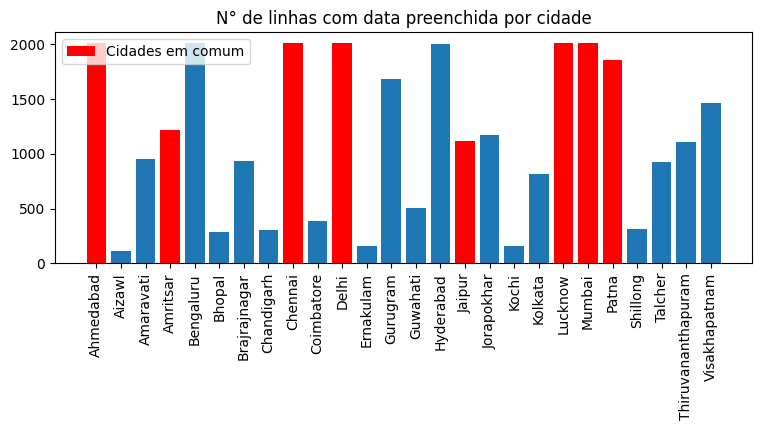

In [5]:
common_cities = np.intersect1d(df_weather['city_name'].unique(), df_air_quality['City'].unique())

fig, ax = plt.subplots(figsize=(9,3))

plot_bar(
    ax, 
    df_air_quality.groupby('City').count()['Date'], 
    "N° de linhas com data preenchida por cidade",
    color_map={cc : 'red' for cc in common_cities}
)

ax.legend(['Cidades em comum'])

In [6]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182600 entries, 0 to 182599
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   city_name                    182600 non-null  object 
 1   datetime                     182600 non-null  object 
 2   weather_code                 182600 non-null  float64
 3   temperature_2m_max           182600 non-null  float64
 4   temperature_2m_min           182600 non-null  float64
 5   temperature_2m_mean          182600 non-null  float64
 6   apparent_temperature_max     182600 non-null  float64
 7   apparent_temperature_min     182600 non-null  float64
 8   apparent_temperature_mean    182600 non-null  float64
 9   sunrise                      182600 non-null  object 
 10  sunset                       182600 non-null  object 
 11  daylight_duration            182600 non-null  float64
 12  sunshine_duration            182600 non-null  float64
 13 

Pode acontecer de uma cidade conter datas que não estão simultaneamente nos dois conjuntos de dados

In [7]:
import ipywidgets as widgets
from IPython.display import display, clear_output

def get_date_range_text(city):
    try:
        air_data = df_air_quality[df_air_quality['City'] == city]
        weather_data = df_weather[df_weather['city_name'] == city]

        air_min = air_data['Date'].min()
        air_max = air_data['Date'].max()
        weather_min = weather_data['datetime'].min()
        weather_max = weather_data['datetime'].max()

        return f'Em {city}, há dados de {air_min} até {air_max} (qualidade do ar), e de {weather_min} até {weather_max} (clima).'
    except Exception as e:
        return f"Erro ao buscar dados para {city}: {e}"
    
city_dropdown = widgets.Dropdown(
    options=common_cities,
    value=common_cities[0],
    description='Cidade'
)
output = widgets.Output()

def update_output(change):
    with output:
        clear_output()
        message = get_date_range_text(change['new'])
        print(message)

city_dropdown.observe(update_output, names='value')

display(city_dropdown, output)
update_output({'new': city_dropdown.value})

Dropdown(description='Cidade', options=('Ahmedabad', 'Amritsar', 'Chennai', 'Delhi', 'Jaipur', 'Lucknow', 'Mum…

Output()

## Análises pretendidas

- Analisar como o AQI das cidades se compoortaram em uma série temporal
- Atestar se houve diminuição ou aumento do AQI tendo como referência a data mais antiga e a mais recente
- Verificar a correlação entre: 
    - Poluentes do ar x AQI (qual poluente tem mais influência no AQI?)
    - Poluentes do ar x Temperatura média
    - Poluentes do ar x Radiação solar de onda curta
    - Poluentes do ar x Horas de precipitação
    
**Observações:** 
- Assegurar que os cálculos de correlação estão sendo feitos no mesmo periodo de tempo
- Desconsiderar AQIs e concentrações de poluentes *outliers* nas análises que envolvem correlação e cálculo de score de AQI

## Pré-processamento

Para que as análises acima sejam feitas, é necessário construir um único dataset com dados dos poluentes do ar, da temperatura média, radiação solar e tempo de precipitação das cidades em comum aos dois conjuntos de dados. 

Porém, antes de construí-lo, é necessário escolher uma estratégia para preencher as concentrações de poluentes faltantes nas análises que envolvem periodo. 

Além do mais, neste dataset resultante, devemos apenas considerar datas que estejam simultaneamente nos dois conjuntos de dados e nas mesmas cidades.